<a href="https://colab.research.google.com/github/ATOMconsortium/AMPL/blob/master/atomsci/ddm/examples/tutorials/06a_UnionDSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Unionset Train/Test data creation 

This notebook explain the steps for creating Union Train/test set data

# Install AMPL 

In [ ]:
! pip install rdkit-pypi
! pip install --pre deepchem

import deepchem
# print(deepchem.__version__)
! pip install umap
! pip install llvmlite==0.34.0  --ignore-installed
! pip install umap-learn
! pip install molvs
! pip install bravado

In [ ]:
import deepchem as dc

# get the Install AMPL_GPU_test.sh
!wget https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/config/install_AMPL_GPU_test.sh

# run the script to install AMPL
! chmod u+x install_AMPL_GPU_test.sh
! ./install_AMPL_GPU_test.sh

# Load libraries

In [16]:
import matplotlib
matplotlib.use('Agg')
import pandas as pd, os, csv
import numpy as np

import atomsci.ddm.pipeline.chem_diversity as cd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# import genTestSet
# comment for now
from atomsci.ddm.utils import genTestset
from atomsci.ddm.utils.genTestset import * 

# Download datasets

In [21]:
! wget https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/datasets/CYP3A4/ChEMBL25_CYP3A4_IC50_human_ml_ready.csv >& /dev/null
! wget https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/datasets/CYP3A4/cyp3a4_dtc_base_smiles_all.csv >& /dev/null
! wget https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/datasets/CYP3A4/cyp3a4_excape_base_smiles_all.csv >& /dev/null 


In [22]:
filename = 'cyp3a4_dtc_base_smiles_all.csv'
dtc_df=pd.read_csv(filename)
print("Shape of dtc: ", dtc_df.shape)
print("Shape of dtc: ", dtc_df.shape)

Shape of dtc:  (5074, 5)
Shape of dtc:  (5074, 5)


In [23]:
filename = geneName+'_excape_base_smiles_all.csv'
print(filename)
ex_df=pd.read_csv(filename)

print("Shape of ex: ", ex_df.shape)
print("Shape of ex: ", ex_df.shape)


cyp3a4_excape_base_smiles_all.csv
Shape of ex:  (14278, 5)
Shape of ex:  (14278, 5)


In [24]:
filename = 'ChEMBL25_'+geneName.upper()+'_IC50_human_ml_ready.csv'
print(filename)
ch_df=pd.read_csv(filename)
print("Shape of chembl: ", ch_df.shape)

ChEMBL25_CYP3A4_IC50_human_ml_ready.csv
Shape of chembl:  (6515, 5)


In [25]:
# Warning ~ 4.5 minutes
test_fraction = 0.15
# Calling the test set generating function
testset_dtc_df, testset_ex_df, testset_ch_df, trainset_dtc_df,trainset_ex_df,trainset_ch_df = generateTestset(dtc_df,ex_df,ch_df,test_fraction)

Number of total samples:  25867
Number of unique rdkit smiles in all three data sets:  20937
Number of rdkit smiles in the union set:  20937
(20937,)
(20937, 2)
20937
Number of randomely selected samples:  8375
distance from test set to training set, length:  (8375,)


/usr/local/lib/python3.7/dist-packages/atomsci/ddm/utils/genTestset.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_dtc_df.sort_values(['dist2train','sumDist'], inplace=True,ascending=False)
/usr/local/lib/python3.7/dist-packages/atomsci/ddm/utils/genTestset.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_ex_df.sort_values(['dist2train','sumDist'], inplace=True,ascending=False)
/usr/local/lib/python3.7/dist-packages/atomsci/ddm/utils/genTestset.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://panda

In [26]:
testset_dtc_df.head(3)

,PIC50,base_rdkit_smiles,compound_id,relation,active
2,5.920819,CNC(C)C(=O)NC1CN(C(=O)c2cccnc2)c2ccccc2N(Cc2c(...,XOTGKSFDRNMNQY-FEINMWSASA-N,NaN,1
5,4.522879,Nc1cc(CN2CCC(F)(C(=O)N3CCC(N4Cc5ccc(F)cc5C4)CC...,MLBBOYBRPZGZGW-UHFFFAOYSA-N,>,1
37,5.565384,Cc1cc(Cl)cc2c(C(O)c3ncco3)c3c(C)[nH]nc3nc12,MTYKIQDYUJLUDE-UHFFFAOYSA-N,NaN,1


In [27]:
testset_ex_df.head(3)

,base_rdkit_smiles,compound_id,pXC50,relation,active
3,C=CCN1C(=O)c2ccccc2Sc2ccc(C(=O)N3CCC4(CC3)OCCO...,WLEPRPCNRQRIHD-UHFFFAOYNA-N,5.4,NaN,1
22,CC(C(=O)Nc1ccccc1Sc1ccccc1)N(c1ccccc1)S(C)(=O)=O,BSAPOTTZWCQXNU-MPIMZMORNA-N,5.3,NaN,1
32,COc1ccc(NC(=O)N2CC[C@@]3(CCCN(C(=O)c4c(C)noc4C...,NMLSZMPLFQUCQI-HGHPDAPZNA-N,5.1,NaN,1


In [28]:
testset_ch_df.head(3)

,base_rdkit_smiles,compound_id,pIC50,relation,active
5,Cc1[nH]c2ccccc2c1CCN1Cc2ccc(/C=C/C(=O)NO)cc2C1,CHEMBL1088949,5.000000,<,0
8,CC(C)N1CCC(NC(=O)c2ccc(OC3CCN(C4CCC4)CC3)cc2)C1,CHEMBL3754205,4.522879,<,0
10,O=C(c1cccc(Cl)c1-n1nccn1)N1CCOC[C@H]1Cc1cc(-n2...,CHEMBL3924060,4.522879,NaN,1


## Save Union DTC Train/Test datasets

In [29]:
# Save to files
fileName = geneName+'_dtc_testset_base_smiles_union.csv'

testset_dtc_df.to_csv(fileName, index=False, header=True )

fileName = geneName+'_dtc_trainset_base_smiles_union.csv'
trainset_dtc_df.to_csv(fileName, index=False, header=True )

## Save Union ExCAPE-DB Train/Test datasets

In [30]:
fileName = geneName+'_excape_testset_base_smiles_union.csv'

testset_ex_df.to_csv(fileName,index=False,header=True )

fileName = geneName+'_excape_trainset_base_smiles_union.csv'
trainset_ex_df.to_csv(fileName,index=False,header=True )

## Save ChEMBL Train/Test datasets

In [31]:
fileName = geneName+'_chembl_testset_base_smiles_union.csv'
testset_ch_df.to_csv(fileName,index=False,header=True )

fileName = geneName+'_chembl_trainset_base_smiles_union.csv'
trainset_ch_df.to_csv(fileName,index=False,header=True )

## Plot Venn diagram

In [32]:
# Plot venn3 distribution 
dtc_s = dtc_df['base_rdkit_smiles'].tolist()
ex_s = ex_df['base_rdkit_smiles'].tolist()
ch_s = ch_df['base_rdkit_smiles'].tolist()

dtc_set = set(dtc_s)
ex_set = set(ex_s)
ch_set = set(ch_s)

In [33]:
fig = plt.figure()
venn3([dtc_set, ex_set, ch_set], ('DTC', 'Excape', 'ChEMBL'))
plt.title(geneName.upper())
fig.savefig('geneName'+'_union_venn.png')

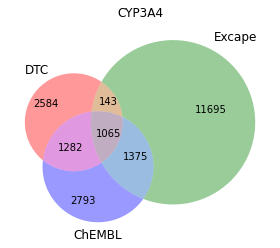

In [34]:
fig

## Plot selected random samples venn

In [37]:
subset_sel_dtc = testset_dtc_df['base_rdkit_smiles']
subset_sel_ex = testset_ex_df['base_rdkit_smiles']
subset_sel_ch = testset_ch_df['base_rdkit_smiles'] 

dtc_set = set(subset_sel_dtc)
ex_set = set(subset_sel_ex)
ch_set = set(subset_sel_ch)

In [38]:
fig = plt.figure()
venn3([dtc_set, ex_set, ch_set], ('DTC', 'Excape', 'ChEMBL'))
plt.title(geneName.upper()+' Top ' +str(round(test_fraction*100))+'% Distances to Training, True Sources')
fig.savefig(geneName+'_union_randomSample_proportionSub_dist2train_venn_frac015_forceTrue.png')

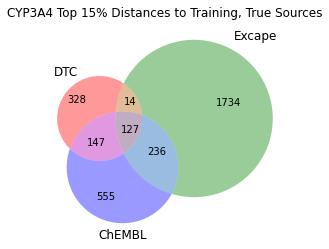

In [39]:
fig

## Gather information for plotting PIC50

In [40]:
sel_dtc_pic50 = testset_dtc_df['PIC50']
sel_ex_pic50 = testset_ex_df['pXC50']
sel_ch_pic50 = testset_ch_df['pIC50']

In [41]:
fig = plt.figure()

sns.distplot(sel_dtc_pic50,hist=False,kde=True,label='DTC')
sns.distplot(sel_ex_pic50,hist=False,kde=True,label='Excape')
sns.distplot(sel_ch_pic50,hist=False,kde=True,label='ChEMBL')
plt.ylabel('Density')
plt.title(geneName.upper()+' Test Set, '+str(round(test_fraction*100))+'%') 
fig.savefig(geneName+'_union_randomSample_proportionSub_pic50Dist_frac015_force.png')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

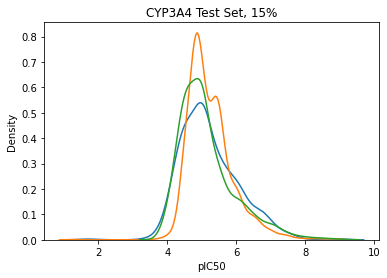

In [42]:
fig

In [43]:
dtc_pic50 = dtc_df['PIC50']
ex_pic50 = ex_df['pXC50']
ch_pic50 = ch_df['pIC50']

In [44]:
fig = plt.figure()
sns.distplot(dtc_pic50,hist=False,kde=True,label='DTC')
sns.distplot(ex_pic50,hist=False,kde=True,label='Excape')
sns.distplot(ch_pic50,hist=False,kde=True,label='ChEMBL')
plt.ylabel('Density')
plt.title(geneName.upper())
plt.legend()
fig.savefig(geneName+'_pic50Dist.png')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

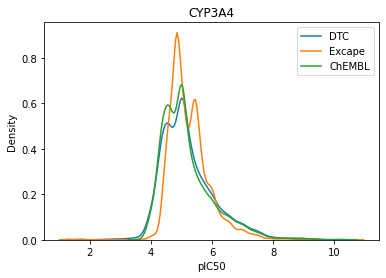

In [45]:
fig

## Combine the testsets

In [46]:
testset_dtc_df.columns

Index(['PIC50', 'base_rdkit_smiles', 'compound_id', 'relation', 'active'], dtype='object')

In [47]:
testset_ex_df.columns

Index(['base_rdkit_smiles', 'compound_id', 'pXC50', 'relation', 'active'], dtype='object')

In [48]:
testset_ch_df.columns

Index(['base_rdkit_smiles', 'compound_id', 'pIC50', 'relation', 'active'], dtype='object')

## Prepare DataFrames for concatanation

In [49]:
testset_dtc_df  = testset_dtc_df.rename(columns={'PIC50':'pIC50'})
trainset_dtc_df = trainset_dtc_df.rename(columns={'PIC50':'pIC50'})
testset_ex_df  = testset_ex_df.rename(columns={'pXC50':'pIC50'})
trainset_ex_df = trainset_ex_df.rename(columns={'pXC50':'pIC50'})

In [50]:
testUnion_df = genTestset.genUnionSet(testset_dtc_df,testset_ex_df,testset_ch_df)
print(testUnion_df.shape)

Total number of base smiles strings in combined data:  (3792, 5)
0 entries in input table are missing SMILES strings
3141 unique SMILES strings are reduced to 3141 unique base SMILES strings
(3141, 5)


In [51]:
# Combining the training set
trainUnion_df = genUnionSet(trainset_dtc_df,trainset_ex_df,trainset_ch_df)

Total number of base smiles strings in combined data:  (22075, 5)
0 entries in input table are missing SMILES strings
17796 unique SMILES strings are reduced to 17796 unique base SMILES strings


# Save the final data 

In [52]:
fileName = geneName+'_union_testset_base_smiles.csv'
testUnion_df.to_csv(fileName,index=False,header=True)

fileName = geneName+'_union_trainset_base_smiles.csv'
trainUnion_df.to_csv(fileName,index=False,header=True)

In [53]:
!date

Sat Sep 11 02:24:23 UTC 2021
